# <center style='color:sienna'> Principal Component Analysis (`PCA`) </center>

## 1. Import required libraries

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load sklearn's `breast cancer` dataset 

In [2]:
cancer = datasets.load_breast_cancer()
data = cancer.data
labels = cancer.target

In [3]:
data.shape # (n_samples, n_features)

(569, 30)

## 3. Create a dataframe

In [4]:
df = pd.DataFrame(data)
df['Labels'] = labels # add labels to the dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Labels
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.shape

(569, 31)

## 4. Separate features and labels

In [6]:
features = df.iloc[:, :-1]
classes = df.loc[:, 'Labels']

In [7]:
features.shape # same shape as 'data'

(569, 30)

## 5. Perform preprocessing

In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

## 6. 2-dimensional `PCA`

In [9]:
pca_2D = PCA(n_components=2, random_state=0)
reduced_2D = pca_2D.fit_transform(scaled)

In [10]:
reduced_2D.shape # from 30, the features have been reduced to 2

(569, 2)

In [11]:
reduced_2D[:6]

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157],
       [ 2.38024715,  3.9499289 ]])

In [12]:
np.unique(classes) # check unique cancer types 

array([0, 1])

In [13]:
comp1_2D = reduced_2D[:, 0]
comp2_2D = reduced_2D[:, 1]

In [14]:
color_dict = {0: 'r', 1: 'b'}
label_dict = {0: '0', 1: '1'}
marker_dict = {0: 's', 1: 'p'}
alpha_dict = {0: 1, 1: 1}

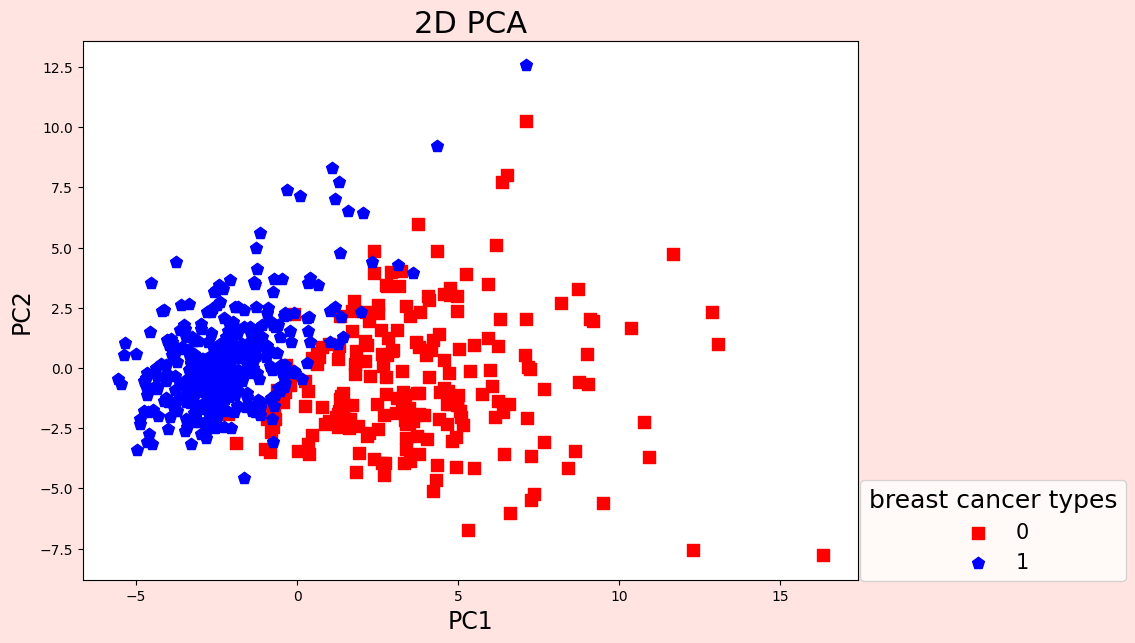

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
fig.patch.set_facecolor('mistyrose')

for i in np.unique(classes):
    j = np.where(classes == i)
    ax.scatter(comp1_2D[j], comp2_2D[j], c=color_dict[i], s=80, label=label_dict[i], marker=marker_dict[i], alpha=alpha_dict[i])

ax.set_xlabel('PC1', fontsize=17)
ax.set_ylabel('PC2', fontsize=17)
ax.set_title('2D PCA', fontsize=22)
ax.legend(title='breast cancer types', bbox_to_anchor=(0.99, 0.205), markerscale=1, fontsize=15, title_fontsize=18);

## 7. 3-dimensional `PCA`

In [16]:
pca_3D = PCA(n_components=3, random_state=0)
reduced_3D = pca_3D.fit_transform(scaled)

In [17]:
reduced_3D.shape # from 30, the features have been reduced to 3

(569, 3)

In [18]:
reduced_3D[:6]

array([[ 9.1928368 ,  1.94858299, -1.12317148],
       [ 2.38780177, -3.76817219, -0.52929877],
       [ 5.73389628, -1.07517377, -0.55174542],
       [ 7.12295317, 10.2755888 , -3.23279535],
       [ 3.93530206, -1.9480718 ,  1.38976494],
       [ 2.38024715,  3.94992889, -2.93487591]])

In [19]:
comp1_3D = reduced_3D[:, 0]
comp2_3D = reduced_3D[:, 1]
comp3_3D = reduced_3D[:, 2]

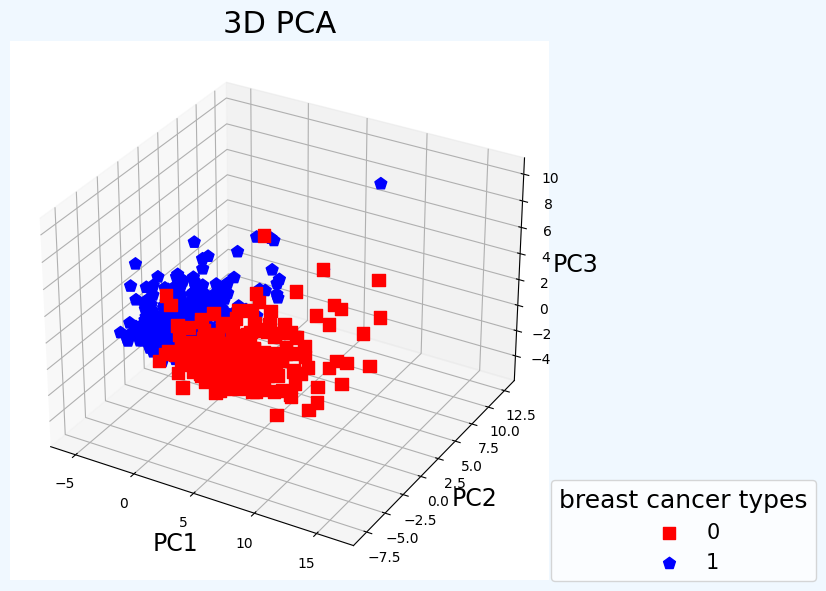

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
fig.patch.set_facecolor('aliceblue')

for i in np.unique(classes):
    j = np.where(classes == i)
    ax.scatter(comp1_3D[j], comp2_3D[j], comp3_3D[j], c=color_dict[i], s=80, label=label_dict[i], marker=marker_dict[i],
               alpha=alpha_dict[i])

ax.set_xlabel('PC1', fontsize=17)
ax.set_ylabel('PC2', fontsize=17)
ax.set_zlabel('PC3', fontsize=17)
ax.set_title('3D PCA', fontsize=22)
ax.legend(title='breast cancer types', bbox_to_anchor=(1.515, 0.205), markerscale=1, fontsize=15, title_fontsize=18);